# Working with Regression Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a continuous dependent variable is known as a **Regression Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Regression Tree model
+ How to visualize the structure of a Regression Tree
+ How to Prune a Regression Tree 

## 1. Collect the Data

In [1]:
import pandas as pd
income = pd.read_csv("income.csv")
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


## 2. Explore the Data

In [2]:
# getting a concise summary of the structure of the data
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [3]:
# getting summary statistics of the numeric columns
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

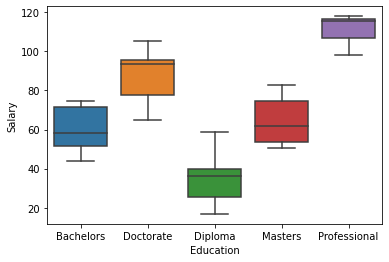

In [5]:
ax = sns.boxplot(data = income, x = 'Education', y = 'Salary')

Those with only a high school diploma tend to have the least salary while those with a professional degree tend to earn the most.

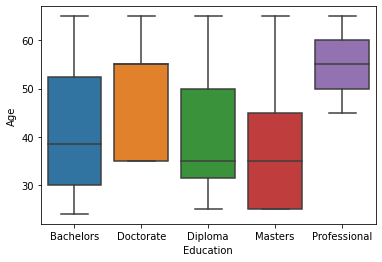

In [6]:
ax = sns.boxplot(data = income, x = 'Education', y = 'Age')

Not much separation, but it's evident that those with a professional degree are tend to be a bit older than the rest of the workers in the dataset.

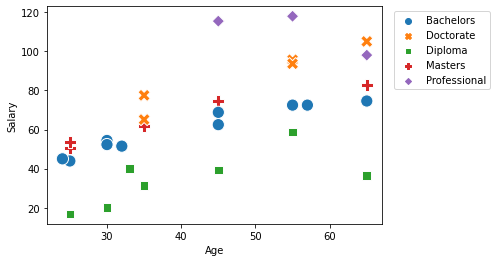

In [7]:
ax = sns.scatterplot(data = income, 
                     x = 'Age', 
                     y = 'Salary', 
                     hue = 'Education', 
                     style = 'Education', 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

Generally, the older the worker is, the higher their salary.

## 3. Prepare the Data

In [8]:
# creating a DataFrame for the dependent variable which is salary
y = income[['Salary']]

In [9]:
# creating DataFrames for the independent variables which is the age and education
X = income[['Age', 'Education']]

In [10]:
# importing the train_test_split function from the sklearn.model_selection sub-package
from sklearn.model_selection import train_test_split
# splitting the DataFrames into X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.6,
                                                    stratify = X['Education'],
                                                    random_state = 1234) 

In [11]:
# checking how many instances/records are there in each dataset
X_train.shape, X_test.shape

((18, 2), (12, 2))

* There are 18 instances in the training data, and 12 instances in the test data (60% of 30 instances in the original data belonged to training data, while the remaning 40% went to the test data).
* sckit-learn doesn't support non-numeric values, so the values in the education column need to be dummy coded.

In [12]:
# previewing the training data before proceeding with dummy coding
X_train.head()

,Age,Education
0,25,Bachelors
16,45,Masters
17,65,Masters
29,65,Professional
8,25,Diploma


In [13]:
# dummy coding the training data
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,1,0,0,0,0
16,45,0,0,0,1,0
17,65,0,0,0,1,0
29,65,0,0,0,0,1
8,25,0,1,0,0,0


In [14]:
# dummy coding the test data
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,0,1,0,0,0
21,25,0,0,0,1,0
4,65,1,0,0,0,0
10,35,0,1,0,0,0
7,65,0,0,1,0,0


## 4. Train and Evaluate the Regression Tree

In [15]:
# importing the DecisionTreeRegressor class from the sklearn.tree sub-package
from sklearn.tree import DecisionTreeRegressor
# instantiating an object from the DecisionTreeRegressor class
regressor = DecisionTreeRegressor(random_state = 1234)

In [16]:
# fitting a regression tree on the training data
model = regressor.fit(X_train, y_train)

In [17]:
# evaluating and estimating the future performance of the model
model.score(X_test, y_test)

0.5853149222529794

The model was only able to explain 58.5% of the variability in the response values of the test data.

In [18]:
y_test_pred = model.predict(X_test)

In [19]:
# importing the mean_absolute_error function from the sklearn.metrics sub-package
from sklearn.metrics import mean_absolute_error
# getting the accuracy by comparing y_test and y_test_pred
mean_absolute_error(y_test, y_test_pred)

13.541666666666666

Moving forward, the predicted salary values would be off by plus or minus 13.5417 dollars from the average.

## 5. Visualize the Regression Tree

[Text(404.23295454545456, 764.4375, 'Age <= 34.0\nmse = 544.18\nsamples = 18\nvalue = 65.367'),
 Text(152.1818181818182, 662.5125, 'Education_Bachelors <= 0.5\nmse = 176.924\nsamples = 5\nvalue = 41.3'),
 Text(76.0909090909091, 560.5875, 'Age <= 29.0\nmse = 133.402\nsamples = 2\nvalue = 28.35'),
 Text(38.04545454545455, 458.66249999999997, 'mse = 0.0\nsamples = 1\nvalue = 16.8'),
 Text(114.13636363636364, 458.66249999999997, 'mse = -0.0\nsamples = 1\nvalue = 39.9'),
 Text(228.27272727272728, 560.5875, 'Age <= 27.5\nmse = 19.602\nsamples = 3\nvalue = 49.933'),
 Text(190.22727272727275, 458.66249999999997, 'mse = 0.0\nsamples = 1\nvalue = 43.9'),
 Text(266.3181818181818, 458.66249999999997, 'Age <= 31.0\nmse = 2.102\nsamples = 2\nvalue = 52.95'),
 Text(228.27272727272728, 356.7375, 'mse = 0.0\nsamples = 1\nvalue = 54.4'),
 Text(304.3636363636364, 356.7375, 'mse = -0.0\nsamples = 1\nvalue = 51.5'),
 Text(656.2840909090909, 662.5125, 'Education_Professional <= 0.5\nmse = 376.98\nsamples = 

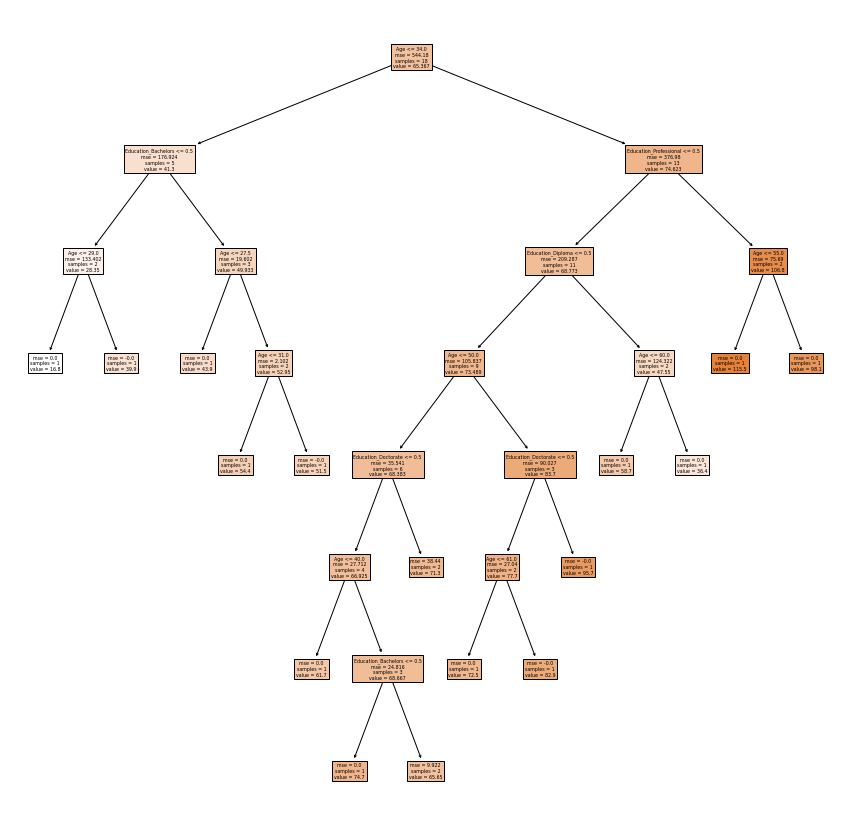

In [22]:
# importing the tree object from the sklearn package
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
               feature_names = list(X_train.columns),
               filled = True)

[Text(418.5, 679.5, 'Age <= 34.0\nmse = 544.18\nsamples = 18\nvalue = 65.367'),
 Text(209.25, 407.69999999999993, 'Education_Bachelors <= 0.5\nmse = 176.924\nsamples = 5\nvalue = 41.3'),
 Text(104.625, 135.89999999999998, '\n  (...)  \n'),
 Text(313.875, 135.89999999999998, '\n  (...)  \n'),
 Text(627.75, 407.69999999999993, 'Education_Professional <= 0.5\nmse = 376.98\nsamples = 13\nvalue = 74.623'),
 Text(523.125, 135.89999999999998, '\n  (...)  \n'),
 Text(732.375, 135.89999999999998, '\n  (...)  \n')]

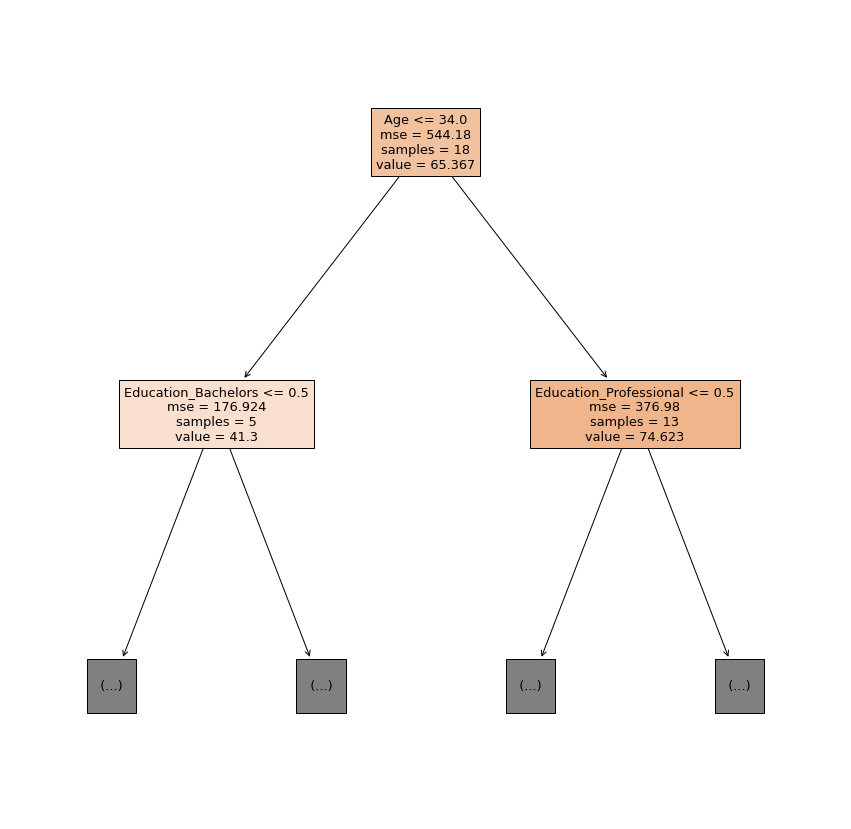

In [23]:
# for illustrative purposes, we'll limit the visualization to the first three nodes of the tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
               feature_names = list(X_train.columns),
               filled = True,
               max_depth = 1)

* Age is the most important variable in the dataset because it was used as criteria for the first split in determining the salary of the worker.
* The criteria "Education_Professional <= 0.5" means "does a worker NOT have a professional degree?" since a value of 0 (considering the dummy coded education values) means the worker does not have a professional degree (thus, Education_Professional <= 0.5, while a value of 1 means the worker does have a professional degree. The same goes for other nodes that has a criteria with regards to educational attainment.
* If the criteria is satisfied, branch to the left; otherwise, branch to the right.
* Each node has an mse value which can be interpreted as the degree of impurity or variability in a partition. The smaller the mse value is, the closer the values are to the mean. Conversely, the larger the mse value is, the further the values are to the mean.
* Number of samples decreases from the root node down to the leaf nodes (which is expected).
* The "value" in the node is the mean of the values (predicted value) in a particular partition of the decision tree.

In [24]:
# getting the importances of the independent variables in predicting the dependent variable
importance = model.feature_importances_
importance

array([0.54597998, 0.06326845, 0.11352129, 0.02490287, 0.        ,
       0.25232742])

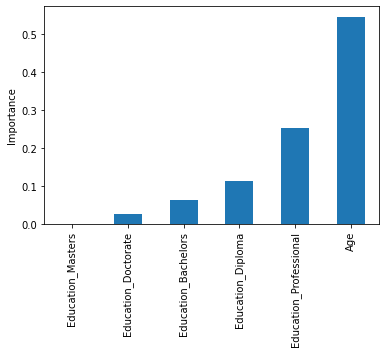

In [25]:
# contextualizing the feature importances values
feature_importance = pd.Series(importance, index = X_train.columns)
feature_importance.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');

The Age variable is the most important in predicting the salary, while "Education_Masters" feature is the least important.

## 6. Prune the Regression Tree

In [26]:
# checking if the model overfitted to the training data
model.score(X_train, y_train)

0.9901253057607573

The model was able to explain 99% of the variability in the training data.

In [27]:
# checking how the model does on the test data
model.score(X_test, y_test)

0.5853149222529794

The model was only able to explain 59% of the variability in the test data, which means that the model overfitted to the training data and thus, needs to be pruned.

Let's get the list of effective alphas for the training data.

In [28]:
# using the post-pruning approach
# specific pruning strategy to be used is cost complexity pruning (primary objective: finding the right alpha)
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512,
 222.77094017094078]

We remove the maximum effective alpha because it is the trivial tree with just one node.

In [29]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 0.23361111111110705,
 2.1578395061724223,
 3.004444444444693,
 3.0334259259259144,
 8.409999999999753,
 12.000000000000506,
 13.813611111110644,
 14.822500000000016,
 26.06669753086468,
 31.05601851851865,
 61.1659960718292,
 135.95562548562512]

Next, we train several trees using the different values for alpha.

In [30]:
# training numerous decision tree models using different alphas
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = alpha)
    model_ = regressor_.fit(X_train, y_train)
    train_scores.append(model_.score(X_train, y_train))
    test_scores.append(model_.score(X_test, y_test))

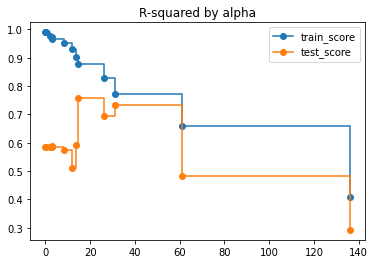

In [31]:
# plotting training and test scores against different values of alpha
plt.plot(ccp_alphas, 
         train_scores, 
         marker = "o", 
         label = 'train_score', 
         drawstyle = "steps-post")
plt.plot(ccp_alphas, 
         test_scores, 
         marker = "o", 
         label = 'test_score', 
         drawstyle = "steps-post")
plt.legend()
plt.title('R-squared by alpha');

* When alpha is zero, the tree overfits (i.e., the training score is at its highest).
* As alpha increases, more of the tree is pruned resulting in reduced training scores.
* The test scores behave a little differently. As alpha increases, the test score initially increases, then declines afterwards.
* The best alpha is the one that corresponds to the highest test score (alpha between 10 and 20).

In [32]:
# getting a list of test scores (listed in the same order as their corresponding alphas)
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385]

In [33]:
# getting the index first to get the best alpha
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

14.822500000000016

Best alpha for the decision tree is 14.8.

In [34]:
# training again a regression tree on the training data pruned using the best alpha
regressor_ = DecisionTreeRegressor(random_state = 1234, ccp_alpha = best_alpha)
model_ = regressor_.fit(X_train, y_train)

In [35]:
model_.score(X_train, y_train)

0.8765762758237674

The r-squared value has gone down from 0.99 to 0.877.

In [36]:
model_.score(X_test, y_test)

0.7572572323335666

The r-squared value has gone up from 0.585 to 0.757.

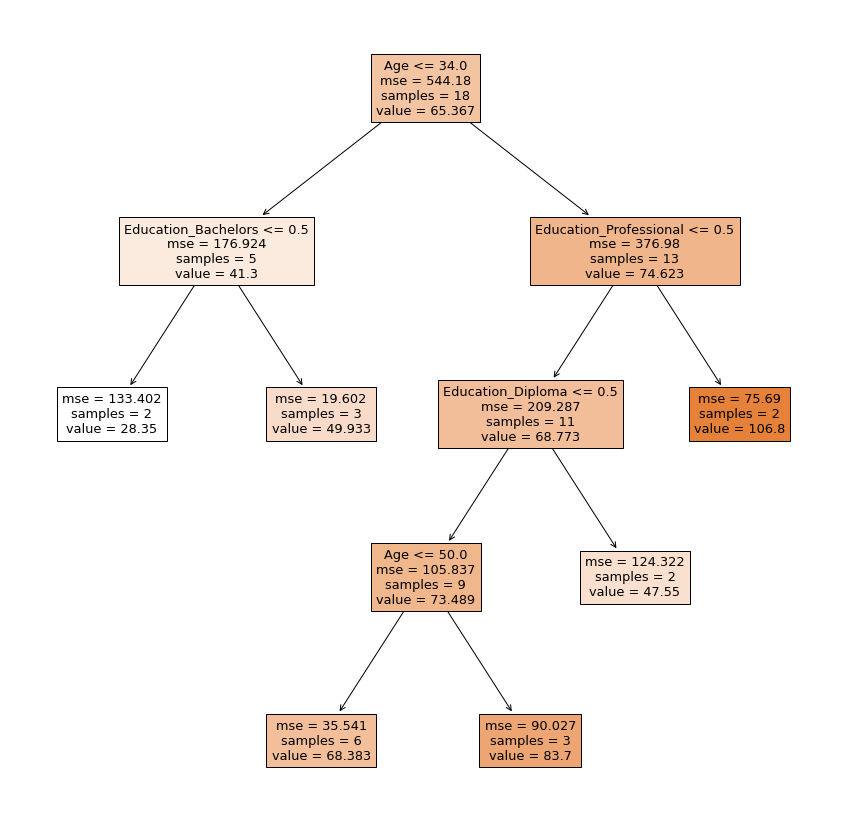

In [37]:
# visualizing the pruned decision tree
plt.figure(figsize = (15,15))
tree.plot_tree(model_, 
                   feature_names = list(X_train.columns),
                   filled = True);

The pruned decision tree is smaller but performs (and generalizes) better than the previous decision tree.